In [4]:
import pandas as pd

columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv('iris.csv', names=columns)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width      True
class           False
dtype: bool

In [11]:
df.loc[df.isna().any(axis=1)]

,sepal length,sepal width,petal length,petal width,class
25,5.0,3.0,1.6,NaN,Iris-setosa


In [12]:
df1 = df.dropna(axis=0, how='any')

In [13]:
df1.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

<Axes: >

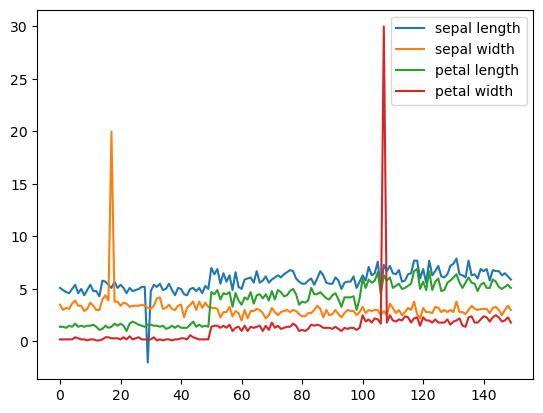

In [14]:
df1.plot()

In [23]:
df2 = df1.drop(
    df1[
        (df1["sepal length"] < 0) | 
        (df1["sepal width"] >= 20) | 
        (df1["petal width"] > 20)].index)

<Axes: >

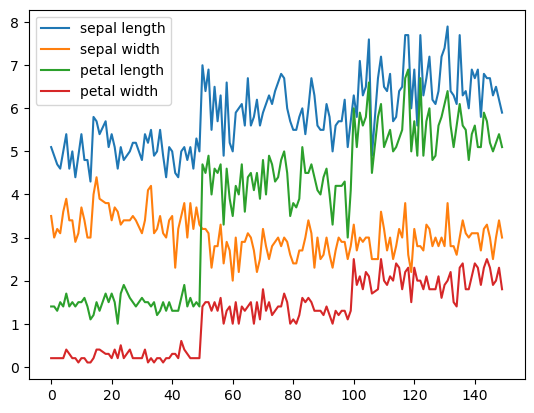

In [24]:
df2.plot()

In [25]:
def get_xy(df):
    return df[["sepal length", "sepal width", "petal length", "petal width"]], df[["class"]]
X, y = get_xy(df2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9545454545454546
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.95        44
      macro avg       0.96      0.94      0.95        44
   weighted avg       0.96      0.95      0.95        44

Confusion Matrix:
 [[17  0  0]
 [ 0 10  2]
 [ 0  0 15]]


/Users/jiazhuofan/opt/anaconda3/envs/ws/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
